In [ ]:
## mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from scipy import optimize

In [ ]:
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

In [ ]:
input_curves = read_csv('/content/drive/MyDrive/problems/problems/frag0.csv')

In [ ]:
input_curves

[[array([[ 41.94200134,  68.98000336],
         [ 41.25960541,  69.81170654],
         [ 40.58875275,  70.65237427],
         [ 39.92960739,  71.50195312],
         [ 39.28233719,  72.36040497],
         [ 38.6471138 ,  73.22766876],
         [ 38.02410889,  74.10371399],
         [ 37.4134903 ,  74.98847961],
         [ 36.81542969,  75.88191986],
         [ 36.23009109,  76.78398895],
         [ 35.65765381,  77.69464874],
         [ 35.09827805,  78.6138382 ],
         [ 34.55213928,  79.54151917],
         [ 34.01940155,  80.47764587],
         [ 33.50024414,  81.42215729],
         [ 32.99482727,  82.37502289],
         [ 32.50332642,  83.33618164],
         [ 32.02590561,  84.30560303],
         [ 31.56274223,  85.28321838],
         [ 31.11400032,  86.26899719],
         [ 30.73366356,  87.13911438],
         [ 30.36473846,  88.0182724 ],
         [ 30.00725937,  88.90615845],
         [ 29.6612606 ,  89.80249023],
         [ 29.3267765 ,  90.70696259],
         [ 29.00383949,  

Detected 3 circles


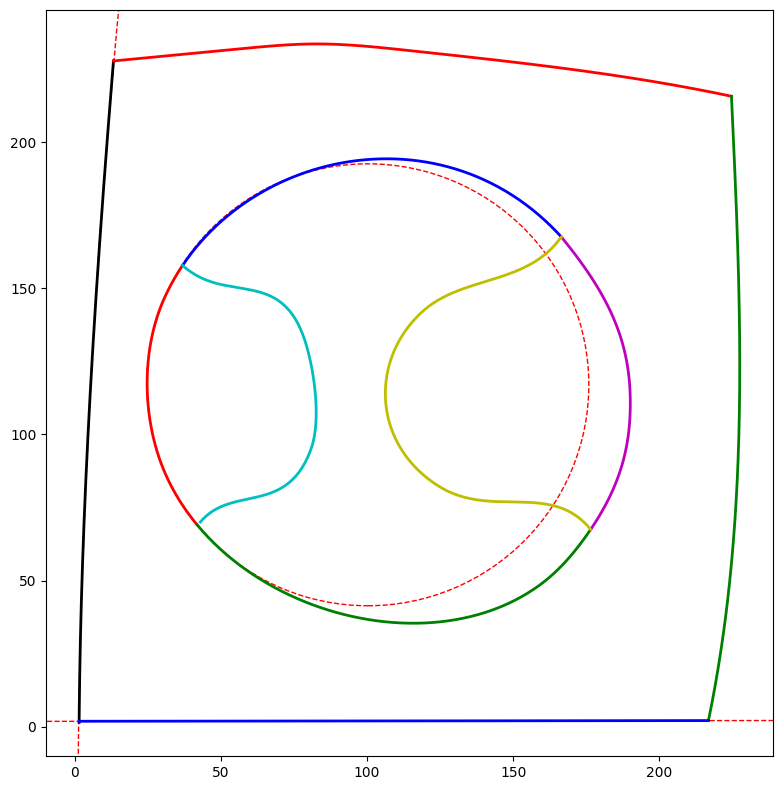

In [ ]:
def fit_circle(points):
    def calc_R(xc, yc):
        return np.sqrt((x-xc)**2 + (y-yc)**2)

    def f_2(c):
        Ri = calc_R(*c)
        return Ri - Ri.mean()

    points = np.array(points)
    x = points[:, 0]
    y = points[:, 1]
    center_estimate = np.mean(points, axis=0)
    center, _ = optimize.leastsq(f_2, center_estimate)
    radius = calc_R(*center).mean()
    return center, radius

def detect_circles(curves, tolerance=0.1):
    circles = []
    for path in curves:
        for curve in path:
            if len(curve) < 3:  # Need at least 3 points to fit a circle
                continue
            center, radius = fit_circle(curve)
            errors = np.abs(np.linalg.norm(curve - center, axis=1) - radius)
            if np.mean(errors) < tolerance:
                circles.append((center, radius))
    return circles

# Usage
detected_circles = detect_circles(input_curves)
print(f"Detected {len(detected_circles)} circles")

# Visualization of detected circles
import matplotlib.pyplot as plt

def plot_curves_and_circles(curves, circles):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    # Plot original curves
    for i, path in enumerate(curves):
        c = colours[i % len(colours)]
        for curve in path:
            ax.plot(curve[:, 0], curve[:, 1], c=c, linewidth=2)

    # Plot detected circles
    for center, radius in circles:
        circle = plt.Circle(center, radius, fill=False, color='r', linestyle='--')
        ax.add_artist(circle)

    ax.set_aspect('equal')
    plt.show()

plot_curves_and_circles(input_curves, detected_circles)

In [ ]:
def detect_symmetry(curve):
    # Center the curve
    centered = curve - np.mean(curve, axis=0)

    # Perform PCA
    _, _, v = np.linalg.svd(centered)

    # Check symmetry along principal axes
    symmetry_scores = []
    for axis in v:
        projected = np.dot(centered, axis)
        flipped = -projected
        score = np.mean(np.abs(np.sort(projected) - np.sort(flipped)))
        symmetry_scores.append(score)

    # Lower score indicates more symmetry
    return symmetry_scores

# Usage
for curve in input_curves:
    symmetry_scores = detect_symmetry(curve)
    print(f"Symmetry scores: {symmetry_scores}")

Symmetry scores: [0.0]
Symmetry scores: [0.0]
Symmetry scores: [0.0]
Symmetry scores: [0.0]
Symmetry scores: [0.0]
Symmetry scores: [0.0]
Symmetry scores: [0.0]
Symmetry scores: [0.0]
Symmetry scores: [0.0]
Symmetry scores: [0.0]


In [ ]:
def complete_curve(curve, gap_threshold=5):
    completed = []
    for i in range(len(curve)):
        completed.append(curve[i])
        if i < len(curve) - 1:
            gap = np.linalg.norm(curve[i+1] - curve[i])
            if gap > gap_threshold:
                # Linear interpolation
                num_points = int(gap / gap_threshold)
                for j in range(1, num_points):
                    t = j / num_points
                    point = curve[i] * (1-t) + curve[i+1] * t
                    completed.append(point)
    return np.array(completed)

# Usage
completed_curves = [complete_curve(curve) for curve in input_curves]

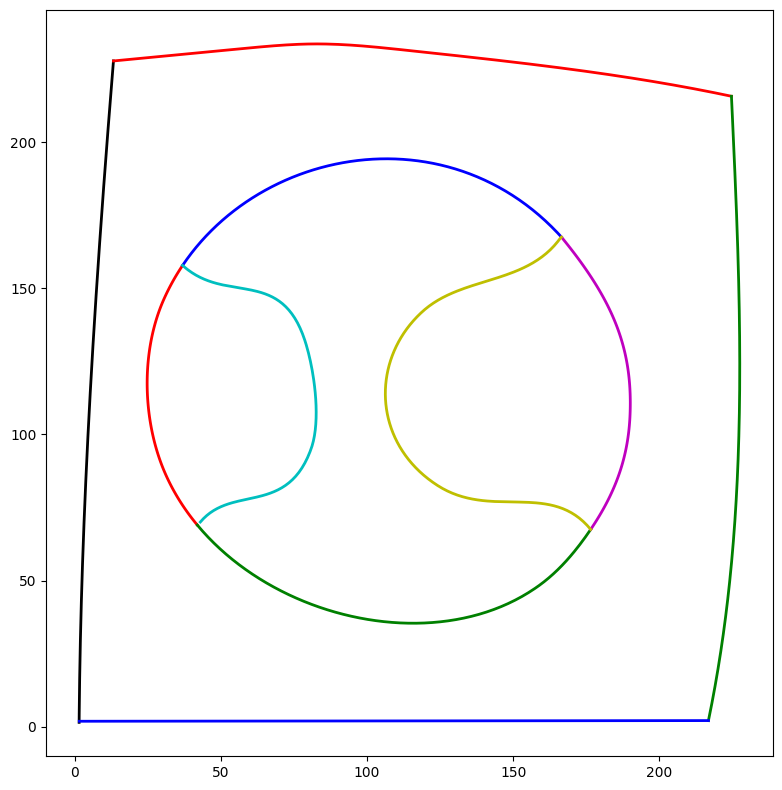

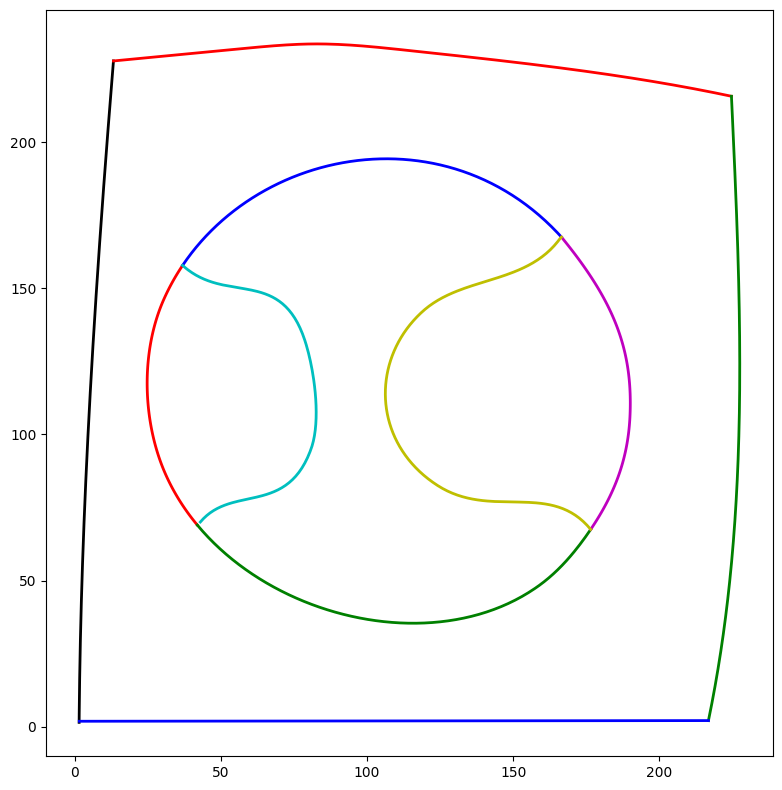

In [ ]:
import matplotlib.pyplot as plt

def plot(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    plt.show()

# Usage
plot(input_curves)
plot(completed_curves)